In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

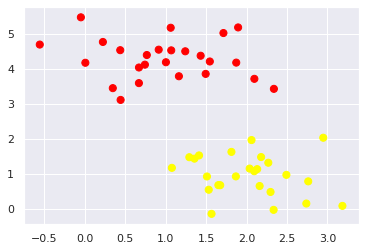

In [2]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=.6)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');

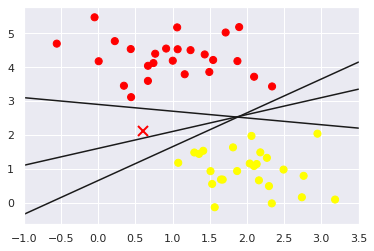

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2,
        markersize=10)

for m, b in [(1, 0.65), (.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

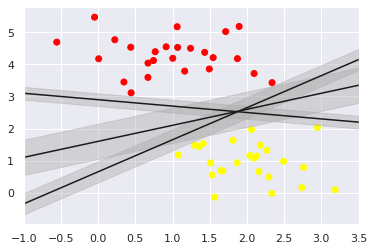

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='autumn')

for m, b, d in [(1, 0.65, .33), (.5, 1.6, .55), (-0.2, 2.9, .2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                    color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, p, colors='k',
              levels=[-1, 0, 1], alpha=.5,
              linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

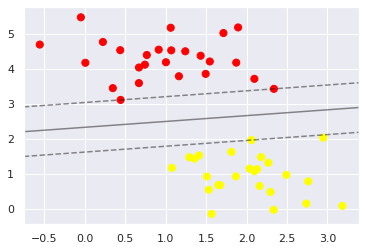

In [8]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

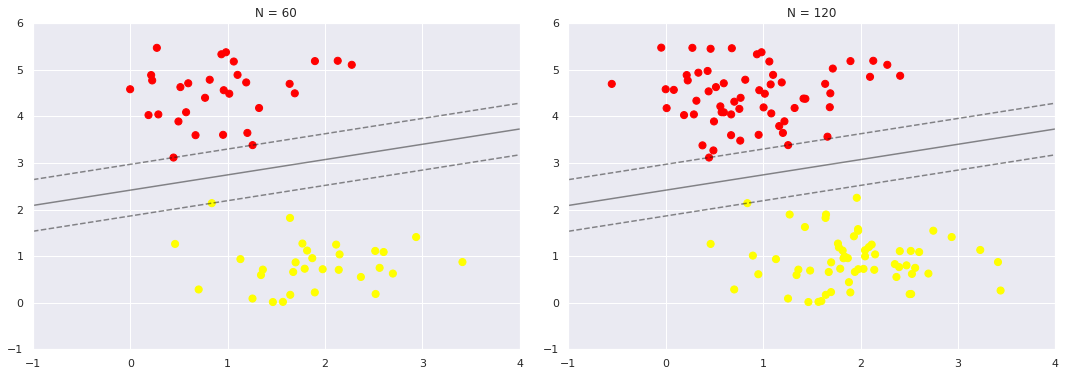

In [10]:
def plot_svm(N=10, ax=None):
    x, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    x = x[:N]
    y = y[:N]
    model= SVC(kernel='linear', C=1E10)
    model.fit(x, y)
    
    ax = ax or plt.gca()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [11]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

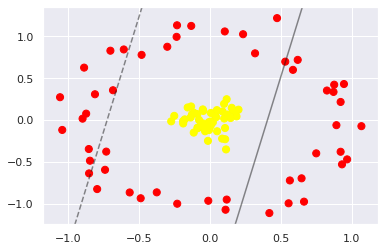

In [22]:
# from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles

x, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [35]:
r = np.exp(-(x ** 2).sum(1))
r

array([0.92659034, 0.98612633, 0.95667733, 0.98143238, 0.43426743,
       0.98957817, 0.98056963, 0.94062857, 0.98011867, 0.27065506,
       0.92793559, 0.40894331, 0.30426696, 0.3078351 , 0.963709  ,
       0.30801321, 0.96899376, 0.47899297, 0.41406733, 0.32295386,
       0.95360642, 0.38742179, 0.33133473, 0.95332323, 0.99611919,
       0.26343329, 0.42474972, 0.99613975, 0.4075298 , 0.96120358,
       0.38882716, 0.9455567 , 0.4958963 , 0.55230546, 0.3398786 ,
       0.97932789, 0.46476562, 0.98964753, 0.99406923, 0.40787082,
       0.27527553, 0.9988747 , 0.95973409, 0.46388266, 0.93629505,
       0.48821642, 0.98005869, 0.37187855, 0.45071995, 0.33104736,
       0.40702163, 0.27793467, 0.99542042, 0.33416956, 0.40208341,
       0.47175705, 0.97945001, 0.31882003, 0.43265667, 0.41861745,
       0.31880043, 0.99935003, 0.18188643, 0.3155083 , 0.50945314,
       0.98341433, 0.98352589, 0.98842188, 0.99974192, 0.94570496,
       0.9654923 , 0.3236618 , 0.31590881, 0.9811935 , 0.99561

In [36]:
x[:, 0]

array([ 0.11765081, -0.00637686, -0.13265797, -0.03426785,  0.56295027,
       -0.01472162, -0.13645893, -0.01396149,  0.05028366, -0.79450132,
       -0.27310548,  0.92038465, -1.05592581, -0.88642492,  0.18703608,
       -0.70122712, -0.17722386,  0.31768963, -0.37469204,  0.10450105,
       -0.1569414 , -0.84508081,  0.23322194,  0.09941585, -0.04812123,
       -0.23182509, -0.30055581, -0.02129132,  0.64527888,  0.1631746 ,
        0.87510599,  0.20103362,  0.58457819, -0.68295211, -0.60691568,
       -0.11378708, -0.87188788,  0.10018096, -0.07707256, -0.73898821,
        0.5539226 ,  0.02048562,  0.18029419,  0.5303895 , -0.25141338,
        0.74853766,  0.10636835,  0.92035282,  0.89069126, -0.48786724,
        0.6181476 , -0.13185408,  0.00515281, -1.0404045 ,  0.11802809,
       -0.8098706 , -0.12660007,  1.06676413, -0.48146233,  0.87031693,
        0.93012109, -0.00781491,  0.47260504,  0.10987174, -0.73054213,
        0.04881254, -0.08615731, -0.03373672,  0.00566361,  0.08

In [37]:
x[:, 1]

array([ 0.24980397, -0.11802603,  0.16337374, -0.13254385, -0.71915347,
       -0.10129063,  0.03163198, -0.2470061 , -0.1324884 , -0.82199621,
       -0.01436505,  0.21695817,  0.27362473,  0.62645183,  0.04453545,
        0.82818666,  0.00942394,  0.79695838, -0.86100671,  1.05798173,
        0.15124036, -0.48381783,  1.02480909,  0.1947248 , -0.03965741,
        1.13146465,  0.87516934, -0.05843283, -0.69372646,  0.11376776,
        0.42285916,  0.1247674 ,  0.59971393,  0.35669377,  0.84310151,
        0.08911383,  0.07767604,  0.01924066,  0.00287153, -0.59220029,
       -0.99154048, -0.02657573,  0.09269862,  0.69771815,  0.05114626,
       -0.39583816, -0.09396061, -0.3770128 , -0.05981781, -0.93138574,
        0.71887584,  1.12382547, -0.06755402, -0.11689833, -0.947188  ,
        0.30887014,  0.06882222, -0.07171337,  0.7784631 ,  0.33666931,
       -0.52731846, -0.0242716 ,  1.21697053, -1.06840932, -0.37513412,
        0.11975846, -0.09585527, -0.10250613, -0.01503459, -0.22

In [44]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, x=x, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(xs=x[:, 0], ys=x[:, 1], zs=r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[-45 -30, 0, 30, 45], azip=(-180, 180),
         x=fixed(x), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=2, options=(-75, 0, 30, 45), value=30), IntSlider(val…

In [45]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(x, y)

SVC(C=1000000.0)

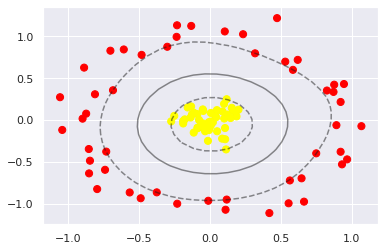

In [46]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=300, lw=1, facecolors='none');

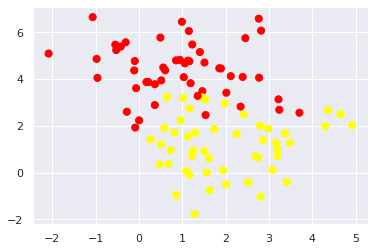

In [47]:
x, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=1.2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');

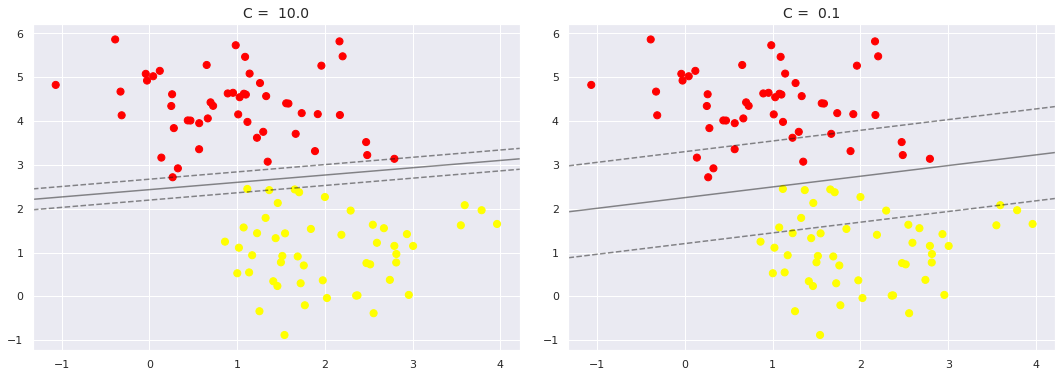

In [48]:
x, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(x, y)
    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none');
    axi.set_title('C = {0: .1f}'.format(C), size=14)

In [49]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


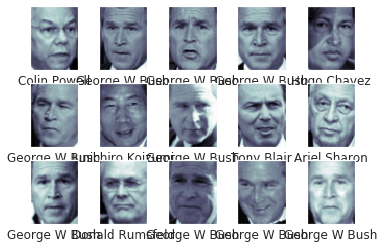

In [50]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [55]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(faces.data,
                                               faces.target, random_state=42)

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(xtrain, ytrain)
print(grid.best_params_)

CPU times: user 49.8 s, sys: 320 ms, total: 50.2 s
Wall time: 25.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [60]:
model = grid.best_estimator_
yfit = model.predict(xtest)

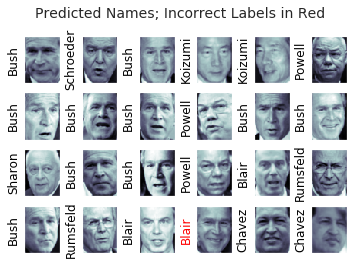

In [63]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



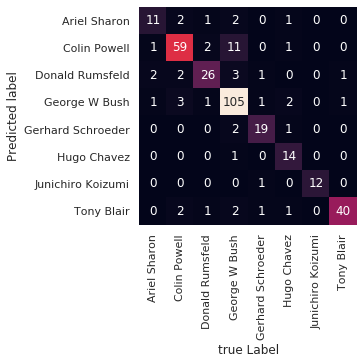

In [66]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true Label')
plt.ylabel('Predicted label');